In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -xvzf "/content/drive/MyDrive/Colab Notebooks/Processed_CSV/cleaned_email_data.tar.gz"

content/cleaned_email_data.csv


In [3]:
csv_file_path = "/content/content/cleaned_email_data.csv"

In [4]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')

import re
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import os
import glob
import string

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [6]:
df_csv = pd.read_csv(csv_file_path)
print(df_csv.shape)
df_csv.head()

(476725, 10)


,file,message,body,From,To,Subject,X-From,X-To,employee_name,folder_name
0,/content/maildir/dasovich-j/sent_items/911.,Message-ID: <8642360.1075851633204.JavaMail.ev...,Heeeeeeeeeeeeee Haaaaaaaaaaawww!!!!! Gouge d...,jeff.dasovich@enron.com,"thompson@enron.com, ttt@cpuc.ca.gov",Re: just thinkin',Jeff Dasovich,"Thompson, Thomas W. <ttt@cpuc.ca.gov>",dasovich-j,sent items
1,/content/maildir/dasovich-j/sent_items/384.,Message-ID: <15996888.1075851619794.JavaMail.e...,I'm hooting just thinking about it. Could we ...,jeff.dasovich@enron.com,pr <.palmer@enron.com>,RE: It seems to be unraveling for Davis--Need ...,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Palmer, Mark A. (PR) </O=ENRON/OU=NA/CN=RECIPI...",dasovich-j,sent items
2,/content/maildir/dasovich-j/sent_items/981.,Message-ID: <3389339.1075852585374.JavaMail.ev...,FYI. In case you'd like to listen in on what ...,jeff.dasovich@enron.com,"susan.mara@enron.com, michael.tribolet@enron.c...",FW: A.98-07-003 - Meet and Confer Conference Call,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Mara, Susan </O=ENRON/OU=NA/CN=RECIPIENTS/CN=S...",dasovich-j,sent items
3,/content/maildir/dasovich-j/sent_items/293.,Message-ID: <13586391.1075851617442.JavaMail.e...,Greetings Eve and Bill:\nThis has been forward...,jeff.dasovich@enron.com,"eve@a-klaws.com, cra@calretailers.com",FW: Draft Application for Rehearing,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","'eve@a-klaws.com', ''Bill Dombrowski' ' <cra@c...",dasovich-j,sent items
4,/content/maildir/dasovich-j/sent_items/2403.,Message-ID: <8782396.1075859207216.JavaMail.ev...,Hey. I'm still trying to get through school a...,jeff.dasovich@enron.com,avram@truebluegrass.com,"RE: Alert- new email address for Avram Siegel,...","Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...",'Avram Siegel' <avram@truebluegrass.com>,dasovich-j,sent items


In [7]:
#copy required columns into new dataframe
df = df_csv.filter(["body","Subject","From","To","folder_name"])
df


,body,Subject,From,To,folder_name
0,Heeeeeeeeeeeeee Haaaaaaaaaaawww!!!!! Gouge d...,Re: just thinkin',jeff.dasovich@enron.com,"thompson@enron.com, ttt@cpuc.ca.gov",sent items
1,I'm hooting just thinking about it. Could we ...,RE: It seems to be unraveling for Davis--Need ...,jeff.dasovich@enron.com,pr <.palmer@enron.com>,sent items
2,FYI. In case you'd like to listen in on what ...,FW: A.98-07-003 - Meet and Confer Conference Call,jeff.dasovich@enron.com,"susan.mara@enron.com, michael.tribolet@enron.c...",sent items
3,Greetings Eve and Bill:\nThis has been forward...,FW: Draft Application for Rehearing,jeff.dasovich@enron.com,"eve@a-klaws.com, cra@calretailers.com",sent items
4,Hey. I'm still trying to get through school a...,"RE: Alert- new email address for Avram Siegel,...",jeff.dasovich@enron.com,avram@truebluegrass.com,sent items
...,...,...,...,...,...
476720,I could let the fluff comment fly if you were ...,Re: How can you not be a fan?,susan.scott@enron.com,benjamin.freeman@enron.com,correspondence
476721,I am not worried about MY handling abilities....,Re:,ted.noble@enron.com,susan.scott@enron.com,correspondence
476722,Thanks for the info...you are a wealth of know...,Re: And this one time at band camp...,susan.scott@enron.com,ted.noble@enron.com,correspondence
476723,Attached is a list of footnotes we have come u...,637 Transactional Report Footnotesq,linda.trevino@enron.com,"frazier.king@enron.com, dari.dornan@enron.com,...",order 637


In [8]:
df.shape

(476725, 5)

In [9]:
#find duplicates in body
#df['body'].duplicated().sum()
df.duplicated().sum()

32894

In [10]:
#remove duplicate data
print("before removal: ",df.shape)
df = df.drop_duplicates()
print("after removal",df.shape)

before removal:  (476725, 5)
after removal (443831, 5)


In [11]:
print(df["folder_name"].value_counts())

all documents                  111954
sent                            54671
discussion threads              49254
deleted items                   39204
sent items                      35969
                                ...  
confirms - interest rate            1
unread mail                         1
tw - marketing                      1
bancone                             1
personnel - prc 2001 mid yr         1
Name: folder_name, Length: 1751, dtype: int64


In [12]:
#remove small folders which may not help us
def remove_folders(emails, n):
    # returns the number of folders containing more than 'n' number of emails
    email_count = dict(df['folder_name'].value_counts())
    small_folders = [key for key, val in email_count.items() if val<=n]
    emails = df.loc[~df['folder_name'].isin(small_folders)]
    return emails


In [13]:
n = 250
df = remove_folders(df, n)

In [14]:
df["folder_name"].value_counts()

all documents          111954
sent                    54671
discussion threads      49254
deleted items           39204
sent items              35969
inbox                   31710
notes inbox             31000
'sent mail              28142
untitled                 4073
personal                 2239
attachments              1915
schedule crawler         1396
logistics                1146
tw-commercial group      1146
california                987
bill williams iii         943
deal discrepancies        878
management                789
esvl                      658
calendar                  630
tufco                     604
resumes                   590
e-mail bin                588
ces                       567
online trading            563
junk                      543
junk file                 493
genco-jv_ipo              458
projects                  446
archives                  404
hr                        385
universities              358
iso_ pricecaps            357
corporate 

In [15]:
#remove few sent folders and OOB folders as they are not user specific folders
df = df[df.folder_name != 'sent']
df = df[df.folder_name != 'all documents']
df = df[df.folder_name != 'deleted items']
df = df[df.folder_name != 'sent items']
df = df[df.folder_name != "'sent mail"]
df = df[df.folder_name != "calendar"]
df = df[df.folder_name != "'sent"]
df = df[df.folder_name != "attachments"]
print(df.shape)
df["folder_name"].value_counts()

(136841, 5)


discussion threads     49254
inbox                  31710
notes inbox            31000
untitled                4073
personal                2239
schedule crawler        1396
logistics               1146
tw-commercial group     1146
california               987
bill williams iii        943
deal discrepancies       878
management               789
esvl                     658
tufco                    604
resumes                  590
e-mail bin               588
ces                      567
online trading           563
junk                     543
junk file                493
genco-jv_ipo             458
projects                 446
archives                 404
hr                       385
universities             358
iso_ pricecaps           357
corporate                353
it                       343
wellhead                 326
california issues        308
europe                   287
eesirenewableenergy      284
ooc                      279
read                     277
ene_ect       

In [16]:
df["text"] = df["From"]+" "+df["To"]+" "+df["Subject"]+" "+df["body"]
#df["text"] = df["Subject"]+" "+df["body"]
df.head()

,body,Subject,From,To,folder_name,text
1237,I will attend the following hearing next Monda...,Hearing,sgovenar@govadv.com,"smara@enron.com, jdasovic@enron.com",inbox,"sgovenar@govadv.com smara@enron.com, jdasovic@..."
1238,Joe Pratt is the Cullen Professor of Business ...,RE: Participation in Roundtable on Lessons Lea...,rob.bradley@enron.com,jeff.dasovich@enron.com,inbox,rob.bradley@enron.com jeff.dasovich@enron.com ...
1239,Jeff--I have a new e mail address: sue@shelt...,e mail address,sue@sheltercorp.com,jeff.dasovich@enron.com,inbox,sue@sheltercorp.com jeff.dasovich@enron.com e ...
1240,"Sorry--Mike's email is md_mills@yahoo.com, I l...",RE: Save the Date: 12/09/01 - Jeff Walker's 40th,madeleine@madeleinetodd.com,"e-mail <.rob@enron.com>, e-mail <.jeff@enron.c...",inbox,madeleine@madeleinetodd.com e-mail <.rob@enron...
1241,"Fellow MBAers,\n\nDovetailing Ken's email rega...",Fw: CSO-This Week In Finance,sfalbie@msn.com,eveningmba@haas.berkeley.edu,inbox,sfalbie@msn.com eveningmba@haas.berkeley.edu F...


In [17]:
#remove other columns
remove_cols = ["Subject","From","To","body"]
df.drop(axis=1,inplace=True,columns=remove_cols)
print(df.shape)
df.head()

(136841, 2)


,folder_name,text
1237,inbox,"sgovenar@govadv.com smara@enron.com, jdasovic@..."
1238,inbox,rob.bradley@enron.com jeff.dasovich@enron.com ...
1239,inbox,sue@sheltercorp.com jeff.dasovich@enron.com e ...
1240,inbox,madeleine@madeleinetodd.com e-mail <.rob@enron...
1241,inbox,sfalbie@msn.com eveningmba@haas.berkeley.edu F...


In [18]:
#pre-process and remove unwanted chars and spaces and new lines
def pre_process_data(all_recs):
  resp = []
  for rec in all_recs:
    rec = rec.lower() #Converting to Lower case
    rec = re.sub('<.*?>',' ',rec) # remove html tags
    #rec = re.sub('[^a-zA-Z]',' ',rec) #remove non-alphabet
    #rec = re.sub(r'\s+[a-zA-Z]\s+',' ',rec) #remove single character
    rec = re.sub(r'\n+', ' ',rec) # remove extra new lines
    #rec = re.sub("["+string.punctuation+"]"," ",rec) #removing all punctuations and replaing with  empty space
    rec = re.sub(r'\s+',' ',rec) #remove extra spaces

    resp.append(rec)
  return resp

In [19]:
import time

In [20]:
start = time.time()
df["text"] = pre_process_data(df["text"])
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  23.156369924545288


In [21]:
print(df.shape)

(136841, 2)


#RoBERTa
https://arxiv.org/pdf/1907.11692.pdf

In [22]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip3 install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.4 MB/s eta 0:00:00


In [24]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.9 MB/s eta 0:00:00


In [ ]:
!pip3 install tensorflow_text

In [25]:
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [35]:
from transformers import RobertaTokenizer, RobertaModel

In [ ]:
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

In [26]:
# Detect hardware, return appropriate distribution strategy 
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    #strategy = tf.distribute.experimental.TPUStrategy(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    print("inside exception",ValueError)
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

Running on TPU  grpc://10.28.71.114:8470
Number of replicas: 8


In [27]:
MODEL_NAME = 'roberta-base'
MAX_LEN = 256
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 5 * strategy.num_replicas_in_sync
EPOCHS = 15

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

In [28]:
X_data = df[['text']].to_numpy().reshape(-1)
y_data = df[['folder_name']].to_numpy().reshape(-1)

In [29]:
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

folders = df['folder_name'].unique()
n_folders = len(folders)
print('Number of folders: %d' % n_folders)



Texts in dataset: 136841
Number of folders: 41


In [30]:
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)
        
        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])
        
        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN
        
        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')
        
        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [31]:
# Transform folder into numbers
folder_to_id = {}
folder_to_name = {}

for index, c in enumerate(y_data):
    if c in folder_to_id:
        folder_id = folder_to_id[c]
    else:
        folder_id = len(folder_to_id)
        folder_to_id[c] = folder_id
        folder_to_name[folder_id] = c
    
    y_data[index] = folder_id

# Display dictionary
folder_to_name

{0: 'inbox',
 1: 'personal',
 2: 'notes inbox',
 3: 'discussion threads',
 4: 'eol',
 5: 'ces',
 6: 'resumes',
 7: 'junk',
 8: 'untitled',
 9: 'info',
 10: 'regulatory',
 11: 'archives',
 12: 'projects',
 13: 'eesirenewableenergy',
 14: 'california',
 15: 'ferc',
 16: 'california issues',
 17: 'online trading',
 18: 'it',
 19: 'corporate',
 20: 'tw-commercial group',
 21: 'schedule crawler',
 22: 'hr',
 23: 'bill williams iii',
 24: 'europe',
 25: 'wellhead',
 26: 'tufco',
 27: 'logistics',
 28: 'ene_ect',
 29: 'management',
 30: 'universities',
 31: 'nelson',
 32: 'e-mail bin',
 33: 'esvl',
 34: 'ooc',
 35: 'east power',
 36: 'iso_ pricecaps',
 37: 'read',
 38: 'junk file',
 39: 'genco-jv_ipo',
 40: 'deal discrepancies'}

In [32]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=777) 

In [33]:
# Import tokenizer from HuggingFace
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [34]:
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')

In [38]:
def build_model(n_folders):
    with strategy.scope():
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        # Import RoBERTa model from HuggingFace
        roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        # Huggingface transformers have multiple outputs, embeddings are the first one,
        # so let's slice out the first position
        x = x[0]

        x = tf.keras.layers.Dropout(0.1)(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(256, activation='relu')(x)
        x = tf.keras.layers.Dense(n_folders, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        #lr=1e-5,
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model

In [39]:
with strategy.scope():
    model = build_model(n_folders)
    model.summary()

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 256)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_word_ids[0][0]',         
 el)                            thPoolingAndCrossAt               'input_mask[0][0]',         

In [40]:
#train model
with strategy.scope():
    print('Training...')
    history = model.fit(X_train,
                        y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        validation_data=(X_test, y_test))

Training...
Epoch 1/15


2737/2737 [==============================] - 513s 158ms/step - loss: 2.1819 - accuracy: 0.3316 - val_loss: 1.8953 - val_accuracy: 0.3901
Epoch 2/15
2737/2737 [==============================] - 375s 137ms/step - loss: 1.8538 - accuracy: 0.4102 - val_loss: 1.7558 - val_accuracy: 0.4650
Epoch 3/15
2737/2737 [==============================] - 375s 137ms/step - loss: 1.7285 - accuracy: 0.4703 - val_loss: 1.6267 - val_accuracy: 0.5153
Epoch 4/15
2737/2737 [==============================] - 375s 137ms/step - loss: 1.6131 - accuracy: 0.5136 - val_loss: 1.5058 - val_accuracy: 0.5516
Epoch 5/15
2737/2737 [==============================] - 375s 137ms/step - loss: 1.5058 - accuracy: 0.5475 - val_loss: 1.4232 - val_accuracy: 0.5708
Epoch 6/15
2737/2737 [==============================] - 376s 137ms/step - loss: 1.4204 - accuracy: 0.5651 - val_loss: 1.3459 - val_accuracy: 0.5834
Epoch 7/15
2737/2737 [==============================] - 374s 137ms/step - loss: 1.3489 - accuracy: 0.5776 - val_loss: 1.283

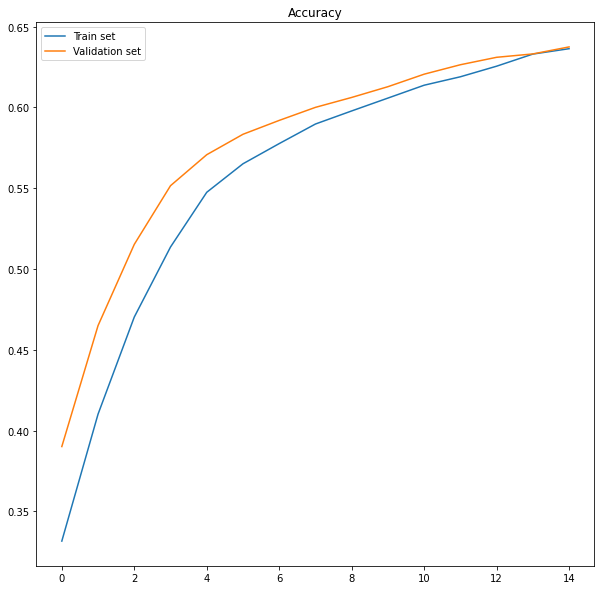

In [41]:
# This plot will look much better if we train models with more epochs, but anyway here is
plt.figure(figsize=(10, 10))
plt.title('Accuracy')

xaxis = np.arange(len(history.history['accuracy']))
plt.plot(xaxis, history.history['accuracy'], label='Train set')
plt.plot(xaxis, history.history['val_accuracy'], label='Validation set')
plt.legend()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 59.14%
